In [1]:
%load_ext autoreload
%autoreload 2

Using DESY6 fid n(z), which has 6 redshift bins


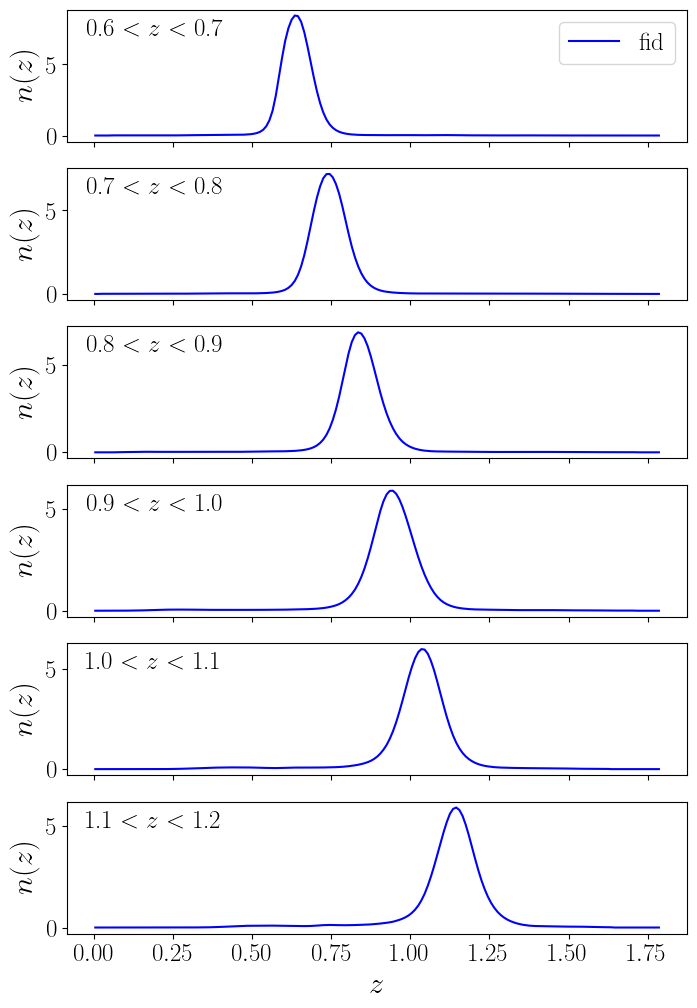

In [4]:
import matplotlib.pyplot as plt
plt.rcParams["text.usetex"] = True
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "Times New Roman"
from utils_data import RedshiftDistributions

dataset = "DESY6"
nz_flag = "fid"

# dataset = "DESIY1_LRG_Abacus"
# nz_flag = "mocks"

colors = {
    ("DESY6", "fid"): "blue", 
    ("DESY6", "clusteringz"): "green", 
    ("DESY6_COLA", "mocks"): "brown", 
    ("DESIY1_LRG_Abacus", "mocks"): "cyan", 
}

nbins = {
    ("DESY6", "fid"): 6,
    ("DESY6","clusteringz"): 4,
    ("DESY6_COLA", "mocks"): 6,
    ("DESIY1_LRG_Abacus", "mocks"): 1,
}

redshift_distributions = RedshiftDistributions(dataset=dataset, nz_flag=nz_flag, verbose=True)

fig, axs = plt.subplots(nbins[dataset, nz_flag], 1, figsize=(8, 2 * nbins[dataset, nz_flag]), sharex=True)

z_edges = redshift_distributions.z_edges
color = colors[(dataset, nz_flag)]

for bin_z in range(nbins[dataset, nz_flag]):

    if dataset not in ["DESIY1_LRG_Abacus"]:
        ax = axs[bin_z]
    else:
        ax = axs

    ax.plot(redshift_distributions.nz_data[:, 0], redshift_distributions.nz_data[:, bin_z + 1], color=color, label=nz_flag)

    if dataset not in ["DESIY1_LRG_Abacus"]:
        z_edge = z_edges[bin_z]
        ax.text(0.03, 0.85, f"{z_edge[0]} $< z <$ {z_edge[1]}", ha="left", va="center", transform=ax.transAxes, fontsize=18)
    else:
        ax.text(0.03, 0.85, f"{z_edges[0][0]:.2f} $< z <$ {z_edges[redshift_distributions.nbins - 1][1]:.2f}", ha="left", va="center", transform=ax.transAxes, fontsize=18)

    if bin_z == nbins[dataset, nz_flag] - 1:
        ax.set_xlabel(r"$z$", fontsize=22)
    ax.set_ylabel(r"$n(z)$", fontsize=22)
    ax.tick_params(axis="x", labelsize=18)
    ax.tick_params(axis="y", labelsize=18)

    if bin_z == 0:
        ax.legend(loc="upper right", fontsize=18)
